Una distribución exponencial tiene esta forma:

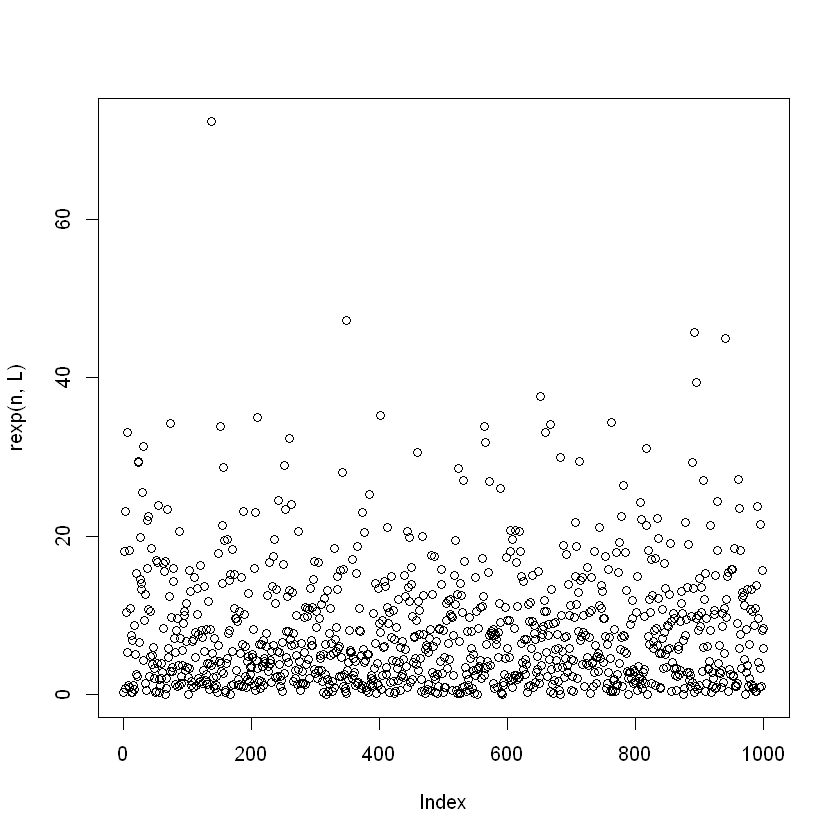

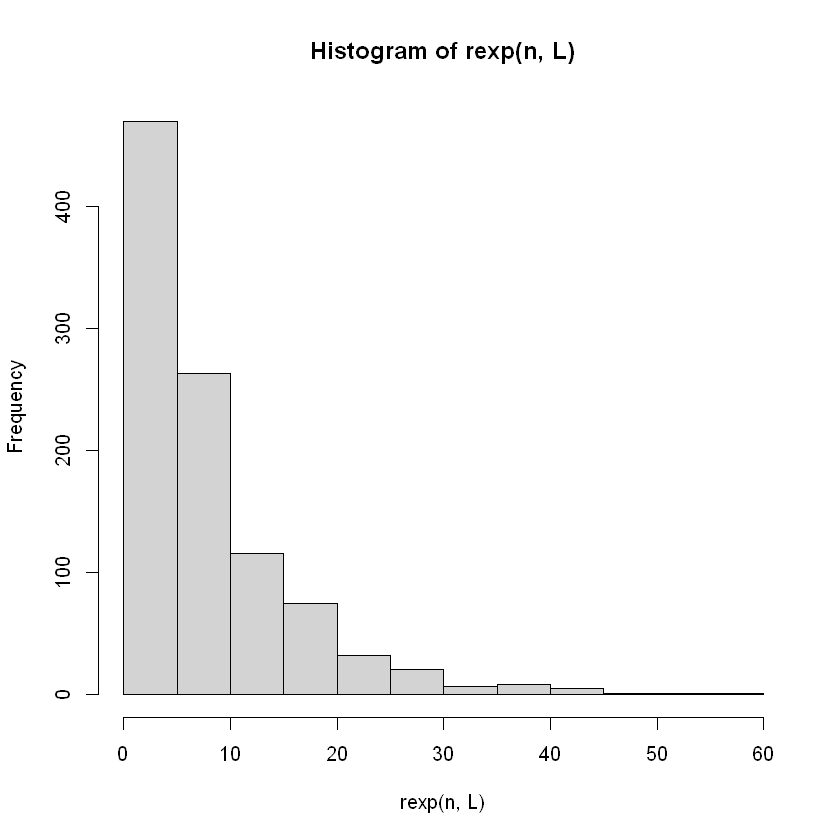

In [16]:
L <- 0.123
n <- 1000
plot(rexp(n, L))
hist(rexp(n, L))

Por otro lado, una distribución de Poisson se parece a esto:

In [68]:
L <- 5
n <- 1000  

pdf('poisson.pdf')
plot(rpois(n, L), xlab="Índice del número generado")
dev.off()

png 
  2

In [69]:
pdf('poisson.pdf')
hist(rpois(n, L), xlab="Número generado", ylab="Frecuencia", main=NULL)
dev.off()

png 
  2

Esta distribución está definida por la cantidad $k$ de veces que se da un evento cuya media de aparición en un intervalo (de tiempo o área) $\lambda$ es conocida, dada la función $$P(X = k) = \frac{\lambda^k \times e^{-\lambda}}{k!}.$$

Esta función tiene como denominador $k!$, que se podría interpretar como las distintas maneras en que se puede dar determinado sucedo. Por ejemplo, por medio del [INEGI](https://www.inegi.org.mx/sistemas/olap/consulta/general_ver4/MDXQueryDatos.asp?proy=) se sabe que la tasa de nacimientos de hombres por hora durante enero de 2018 en México fue $\lambda_1$

In [7]:
lambda1 = round(91396 / 31 / 24)
lambda1

[1] 123

A partir de eso, se podría investigar cuál es la probabilidad $p1$ de que nazcan $k1 = 100$ hombres en una hora.

In [15]:
k1 = 120
p1 = (lambda1 ** k1) * exp(-1 * lambda1) / factorial(k1)
options("scipen"=100, "digits"=4)
p1

[1] 0.03508

Mientras que el histograma sería

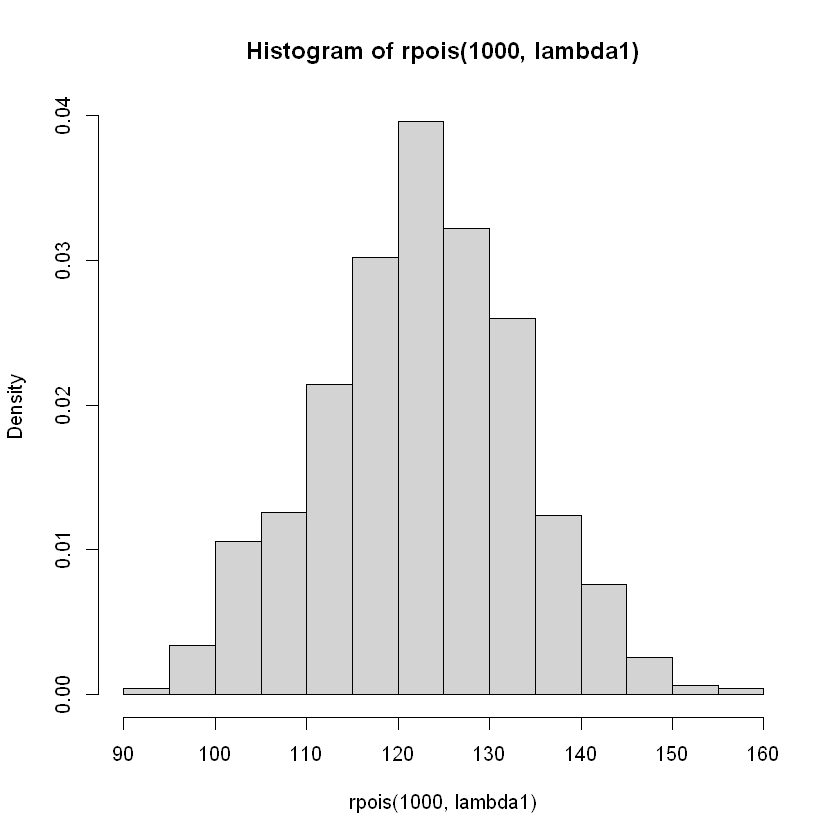

In [66]:
hist(rpois(1000, lambda1), freq = F)

Se puede intentar saber cuánto tardan en obtenerse cien veces valores menores a 0.5:

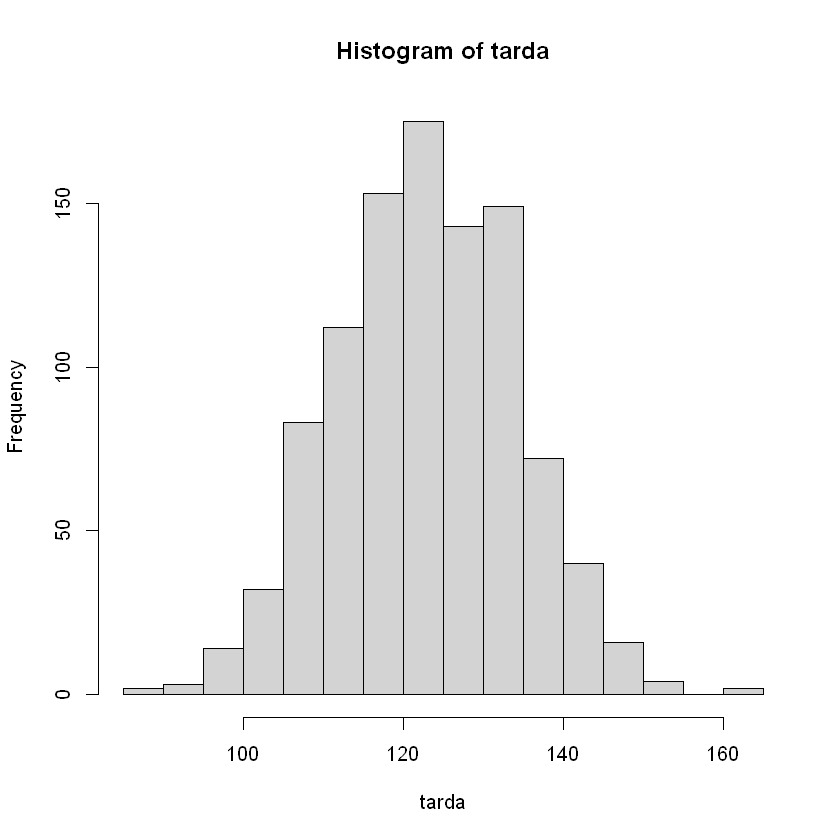

In [13]:
tarda = c()

for (i in 1:1000){
    x = 0
    sum = 0
    dale = TRUE
    while (dale){
        sum = sum + rexp(1)
        if (sum < lambda1){
            x = x + 1
        } else {
            tarda = c(tarda, x)
            dale = FALSE
        }
    }
}

hist(tarda)

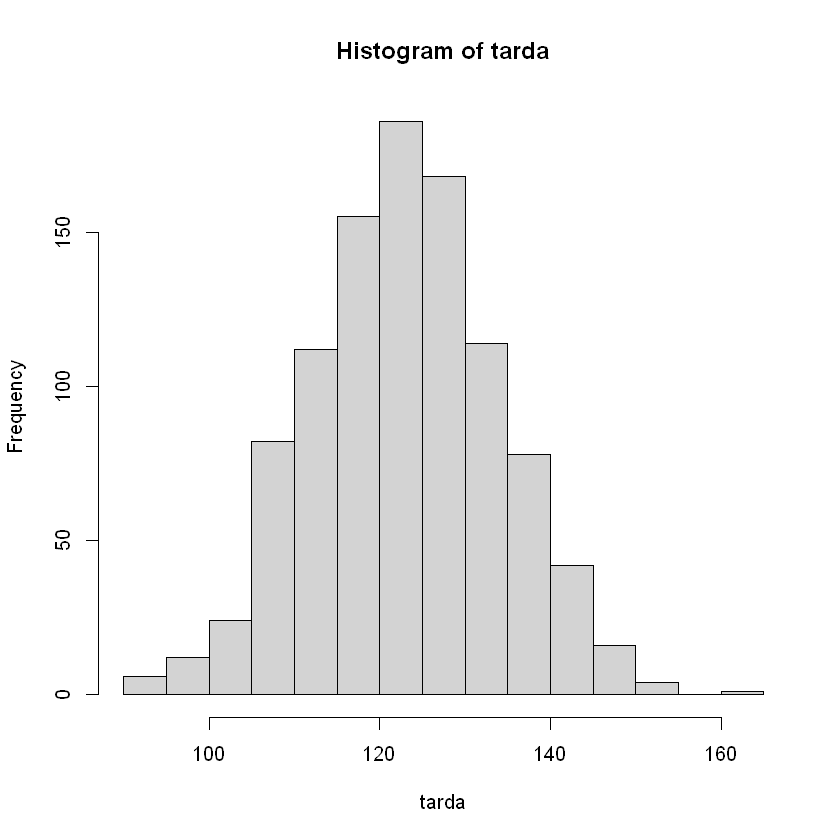

In [9]:
tarda = c()

for (i in 1:1000){
    x = 0
    prod = 1
    dale = TRUE
    while (dale){
        prod = prod * runif(1)
        if (prod > exp(-lambda1)){
            x = x + 1
        } else {
            tarda = c(tarda, x)
            dale = FALSE
        }
    }
}

hist(tarda)

Algo que se puede hacer es generar un proceso cualquiera aleatorio. Por ejemplo, uno en el que se den eventos conforme a una distribución normal con media 1 y desviación estándar 1, luego calcular la suma de 100 números generados al azar de esta manera durante 1000 repeticiones.

In [4]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(rnorm(100, 5, 1))
    res = c(res, suma)
}

pdf('norm.pdf')
hist(res, xlab = "Sumas de 100 números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()
mean(res)

png 
  2

[1] 499.9199

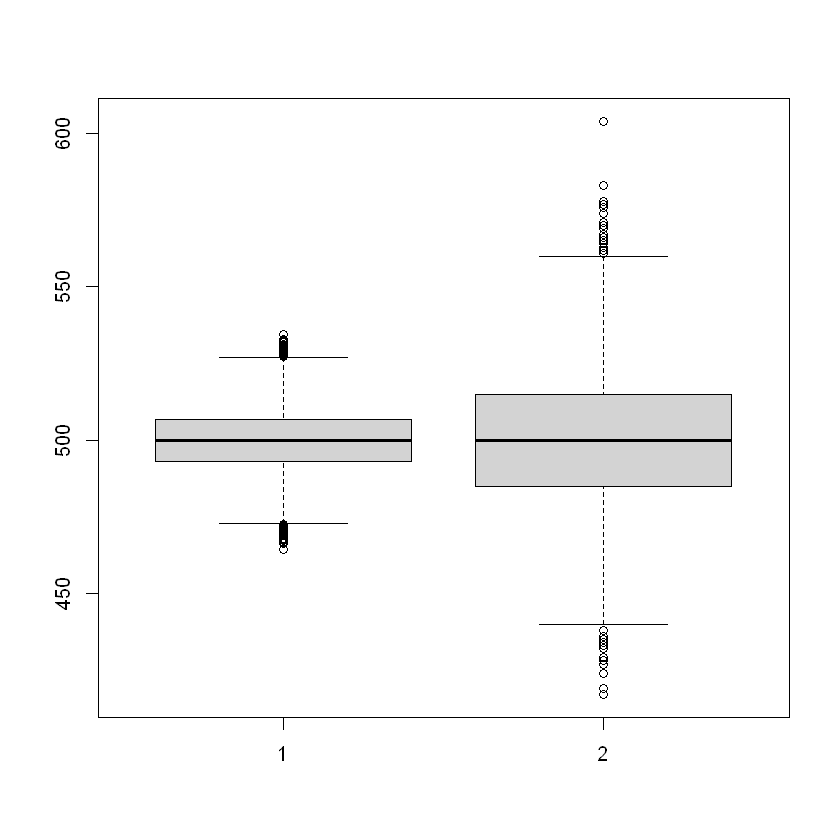

In [25]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(rnorm(100, 5, 1))
    res = c(res, suma)
}

boxplot(res, rpois(N, mu * 5))

Ahora se tiene un experimento en el que se sabe que se tiene una media de 100. ¿Cómo integrar en esto la distribución de Poisson?

In [25]:
pdf('norm_poisson.pdf')
hist(rpois(N, mu * 5), xlab = "Números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()

png 
  2

Ahora se puede hacer algo similar con una distribución uniforme de la que se conozca la media. Por ejemplo:

In [6]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(runif(mu))
    res = c(res, suma)
}
pdf('unif.pdf')
hist(res, xlab = "Sumas de 100 números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()
mean(res)

png 
  2

[1] 50.01075

In [7]:
pdf('unif_poisson.pdf')
hist(rpois(N, mu / 2), xlab = "Números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()

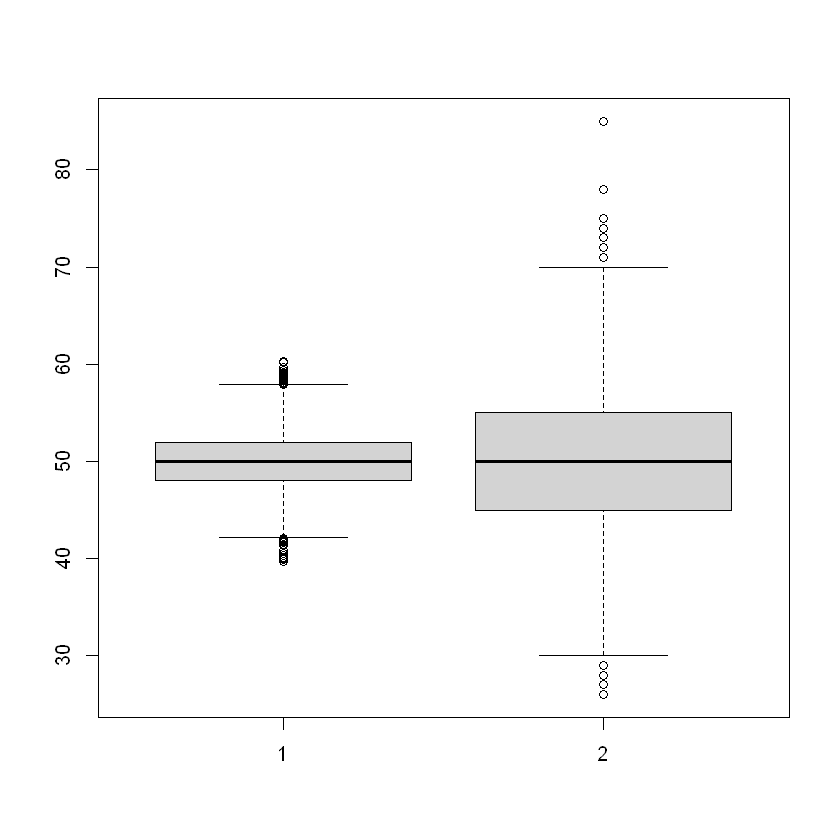

In [27]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(runif(mu))
    res = c(res, suma)
}

boxplot(res, rpois(N, mu / 2))

[1] 49.91348

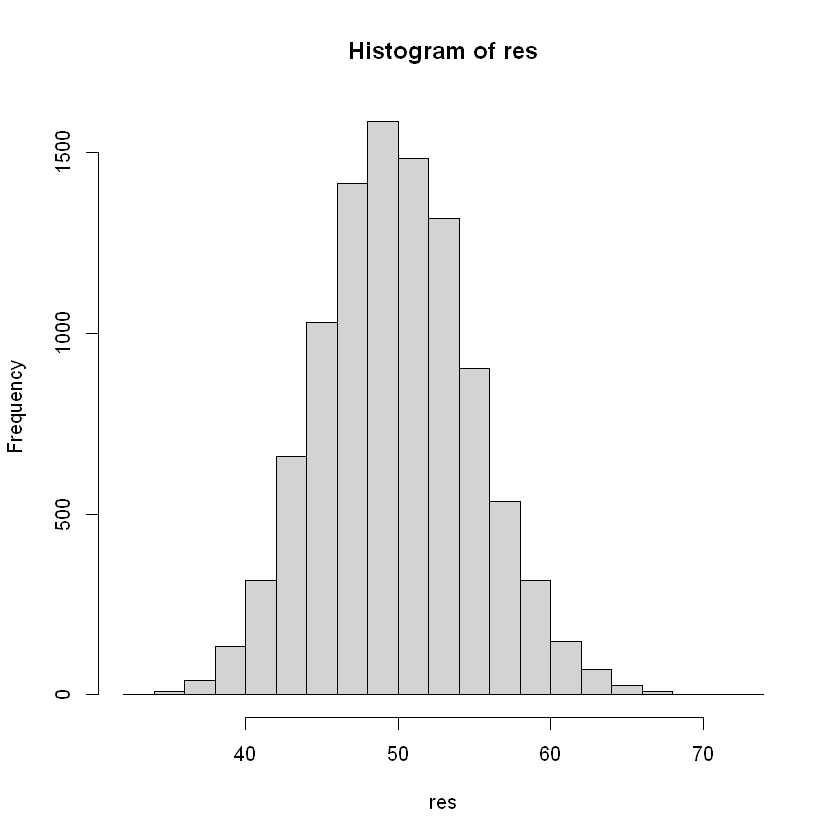

In [14]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(rexp(mu, 2))
    res = c(res, suma)
}
hist(res)
mean(res)

In [92]:
N = 10000
m = 100
mu = 100

res_norm = c()
for (n in 1:N){
    suma = sum(rnorm(m, 1, 1))
    res_norm = c(res_norm, suma)
}

res_unif = c()
for (n in 1:N){
    suma = sum(runif(m * 2))
    res_unif = c(res_unif, suma)
}

res_exp = c()
for (n in 1:N){
    suma = sum(rexp(m, 1))
    res_exp = c(res_exp, suma)
}

res_binom = c()
for (n in 1:N){
    suma = sum(rbinom(m, mu, 0.01))
    res_binom = c(res_binom, suma)
}

C = list(res_norm, res_unif, res_binom, rpois(N, m * mu * p))
names(C) = c("Normal", "Uniforme", "Binomial", "Poisson")

pdf("boxplots.pdf")
boxplot(C, ylab = 'Frecuencia', xlab= "Distribución", cex.lab=1.4, cex.axis=1.4)
dev.off()

png 
  2

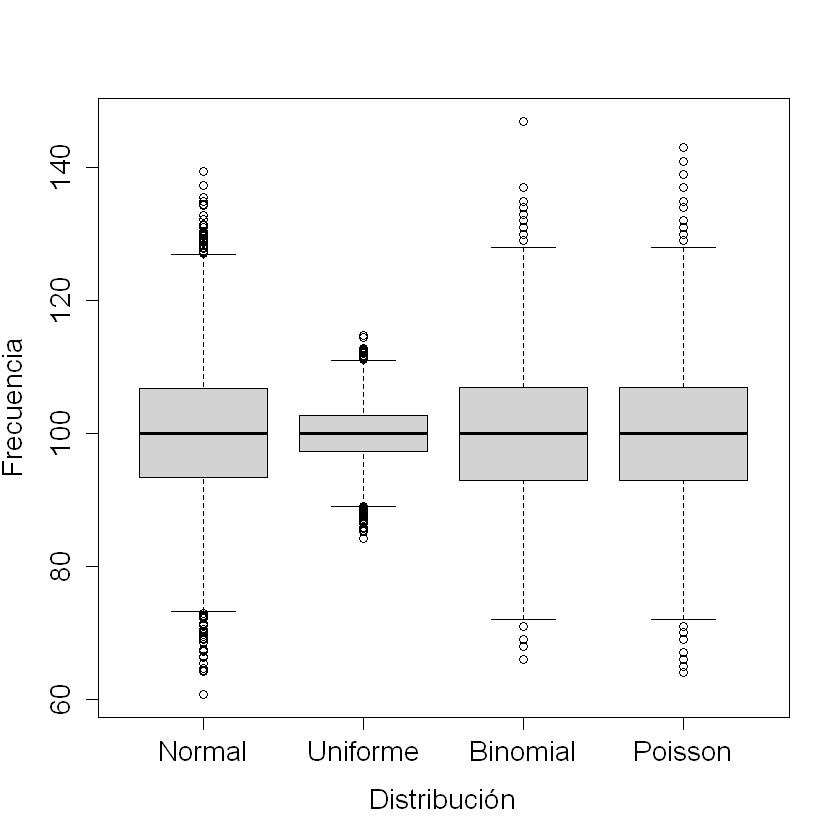

In [93]:
boxplot(C, ylab = 'Frecuencia', xlab= "Distribución", cex.lab=1.4, cex.axis=1.4)

In [67]:
pdf('binom_poisson.pdf')
hist(rpois(10000, 100), xlab = "Números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()

png 
  2

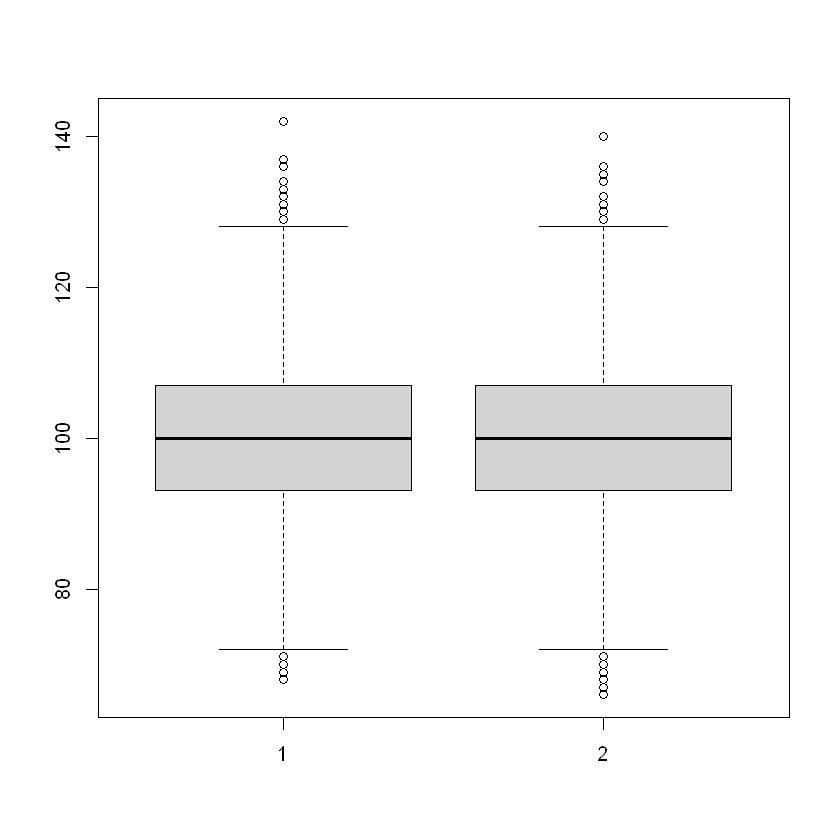

boxplot                package:graphics                R Documentation

_B_o_x _P_l_o_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     Produce box-and-whisker plot(s) of the given (grouped) values.

_U_s_a_g_e:

     boxplot(x, ...)
     
     ## S3 method for class 'formula'
     boxplot(formula, data = NULL, ..., subset, na.action = NULL,
             xlab = mklab(y_var = horizontal),
             ylab = mklab(y_var =!horizontal),
             add = FALSE, ann = !add, horizontal = FALSE,
             drop = FALSE, sep = ".", lex.order = FALSE)
     
     ## Default S3 method:
     boxplot(x, ..., range = 1.5, width = NULL, varwidth = FALSE,
             notch = FALSE, outline = TRUE, names, plot = TRUE,
             border = par("fg"), col = "lightgray", log = "",
             pars = list(boxwex = 0.8, staplewex = 0.5, outwex = 0.5),
              ann = !add, horizontal = FALSE, add = FALSE, at = NULL)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula, such as 'y ~ grp', where 'y' is a numeric vector
          of data values to be split into groups according to the
          grouping variable 'grp' (usually a factor).  Note that '~ g1
          + g2' is equivalent to 'g1:g2'.

    data: a data.frame (or list) from which the variables in 'formula'
          should be taken.

  subset: an optional vector specifying a subset of observations to be
          used for plotting.

na.action: a function which indicates what should happen when the data
          contain 'NA's.  The default is to ignore missing values in
          either the response or the group.

xlab, ylab: x- and y-axis annotation, since R 3.6.0 with a non-empty
          default.  Can be suppressed by 'ann=FALSE'.

     ann: 'logical' indicating if axes should be annotated (by 'xlab'
          and 'ylab').

drop, sep, lex.order: passed to 'split.default', see there.

       x: for specifying data from which the boxplots are to be
          produced. Either a numeric vector, or a single list
          containing such vectors. Additional unnamed arguments specify
          further data as separate vectors (each corresponding to a
          component boxplot).  'NA's are allowed in the data.

     ...: For the 'formula' method, named arguments to be passed to the
          default method.

          For the default method, unnamed arguments are additional data
          vectors (unless 'x' is a list when they are ignored), and
          named arguments are arguments and graphical parameters to be
          passed to 'bxp' in addition to the ones given by argument
          'pars' (and override those in 'pars'). Note that 'bxp' may or
          may not make use of graphical parameters it is passed: see
          its documentation.

   range: this determines how far the plot whiskers extend out from the
          box.  If 'range' is positive, the whiskers extend to the most
          extreme data point which is no more than 'range' times the
          interquartile range from the box. A value of zero causes the
          whiskers to extend to the data extremes.

   width: a vector giving the relative widths of the boxes making up
          the plot.

varwidth: if 'varwidth' is 'TRUE', the boxes are drawn with widths
          proportional to the square-roots of the number of
          observations in the groups.

   notch: if 'notch' is 'TRUE', a notch is drawn in each side of the
          boxes.  If the notches of two plots do not overlap this is
          'strong evidence' that the two medians differ (Chambers _et
          al_, 1983, p. 62).  See 'boxplot.stats' for the calculations
          used.

 outline: if 'outline' is not true, the outliers are not drawn (as
          points whereas S+ uses lines).

   names: group labels which will be printed under each boxplot.  Can
          be a character vector or an expression (see plotmath).

  boxwex: a scale factor to be applied to all boxes.  When there are
          only a few groups, the appearanc

In [54]:
N = 10000
m = 100
mu = 100
p = 0.01
res = c()
for (n in 1:N){
    suma = sum(rbinom(m, mu, 0.01))
    res = c(res, suma)
}
boxplot(res, rpois(N, m * mu * p))

help(boxplot)